In [6]:
 Use this cell to begin your analyses, and add as many cells as you would like!
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/cansuborak/PhytonAnalysis/main/Lego_dataset/lego_sets.csv')

In [8]:
# DATA INTERPRETATION

import pandas as pd

# Option A: Relative Path
df = pd.read_csv('ev_charging_patterns.csv')
print(df.head(10))

FileNotFoundError: [Errno 2] No such file or directory: 'ev_charging_patterns.csv'

In [11]:
df.describe()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1254.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,22.411705,1.061037,14.011326,10.751494,24.074134,17.080580,86.004987,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,23.881193,1.397623,13.856583,13.368141,27.786903,62.053266,79.445335,2.800664,2.000000
50%,75.000000,42.691405,2.258136,25.603799,22.076360,48.241771,75.682496,152.259867,14.630846,4.000000
75%,85.000000,61.206218,3.112806,37.502998,31.646044,69.277921,88.201370,226.073284,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [15]:
df.shape

(1320, 20)

In [17]:
df.columns

Index(['User ID', 'Vehicle Model', 'Battery Capacity (kWh)',
       'Charging Station ID', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type'],
      dtype='object')

In [19]:
df.isna().sum()

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64

In [21]:
df.isnull().sum()

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [116]:
# DEALING WITH MISSING VALUES 
energy_median = df['Energy Consumed (kWh)'].median()
charging_rate_median = df['Charging Rate (kW)'].median()
distance_driven_median = df['Distance Driven (since last charge) (km)'].median()

print("Energy Consumed Median (kWh):", energy_median)
print("Charging Rate Median (kW):", charging_rate_median)
print("Distance Driven Median (km):", distance_driven_median)

df['Energy Consumed (kWh)'].fillna(energy_median, inplace=True)
df['Charging Rate (kW)'].fillna(charging_rate_median, inplace=True)
df['Distance Driven (since last charge) (km)'].fillna(distance_driven_median, inplace=True)

Energy Consumed Median (kWh): 42.69140537961698
Charging Rate Median (kW): 25.603799331857445
Distance Driven Median (km): 152.25986699080715


In [27]:
df.isnull().sum()

User ID                                     0
Vehicle Model                               0
Battery Capacity (kWh)                      0
Charging Station ID                         0
Charging Station Location                   0
Charging Start Time                         0
Charging End Time                           0
Energy Consumed (kWh)                       0
Charging Duration (hours)                   0
Charging Rate (kW)                          0
Charging Cost (USD)                         0
Time of Day                                 0
Day of Week                                 0
State of Charge (Start %)                   0
State of Charge (End %)                     0
Distance Driven (since last charge) (km)    0
Temperature (°C)                            0
Vehicle Age (years)                         0
Charger Type                                0
User Type                                   0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [31]:
df.nunique()

User ID                                     1320
Vehicle Model                                  5
Battery Capacity (kWh)                       147
Charging Station ID                          462
Charging Station Location                      5
Charging Start Time                         1320
Charging End Time                           1309
Energy Consumed (kWh)                       1255
Charging Duration (hours)                   1320
Charging Rate (kW)                          1255
Charging Cost (USD)                         1320
Time of Day                                    4
Day of Week                                    7
State of Charge (Start %)                   1320
State of Charge (End %)                     1320
Distance Driven (since last charge) (km)    1255
Temperature (°C)                            1320
Vehicle Age (years)                          114
Charger Type                                   3
User Type                                      3
dtype: int64

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# UNIVARIATE ANALYSIS
vehicle_model_counts = df['Vehicle Model'].value_counts()
vehicle_model_counts

Vehicle Model
Tesla Model 3    280
Hyundai Kona     266
Nissan Leaf      260
BMW i3           258
Chevy Bolt       256
Name: count, dtype: int64

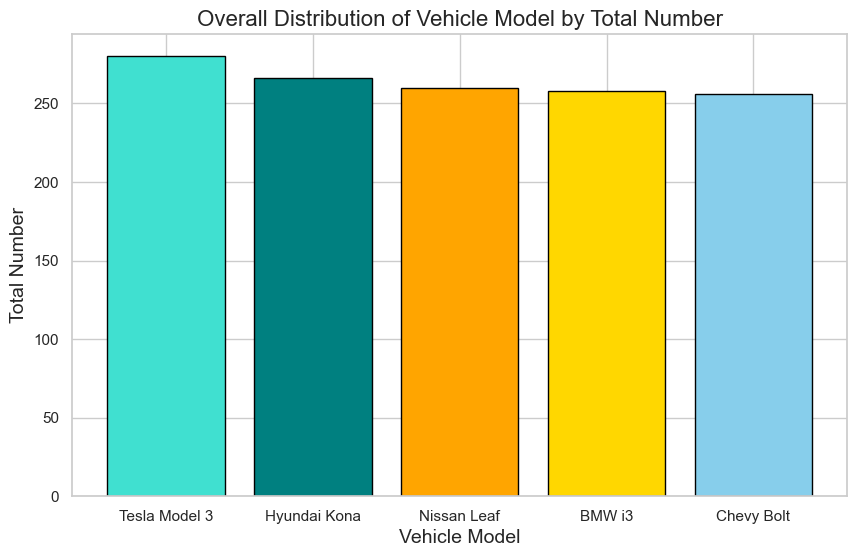

In [128]:
colors = ['turquoise', 'teal', 'orange', 'gold', 'skyblue']

plt.figure(figsize=(10,6))
plt.bar(vehicle_model_counts.index, vehicle_model_counts.values, color=colors[:len(vehicle_model_counts)], edgecolor='black')

plt.xticks(vehicle_model_counts.index, vehicle_model_counts.index, rotation=0)

plt.xlabel("Vehicle Model", fontsize=14)
plt.ylabel("Total Number", fontsize=14)
plt.title("Overall Distribution of Vehicle Model by Total Number", fontsize=16)

plt.show()

In [39]:
charge_loc_counts = df['Charging Station Location'].value_counts()
charge_loc_counts

Charging Station Location
Los Angeles      297
San Francisco    264
Houston          262
New York         255
Chicago          242
Name: count, dtype: int64

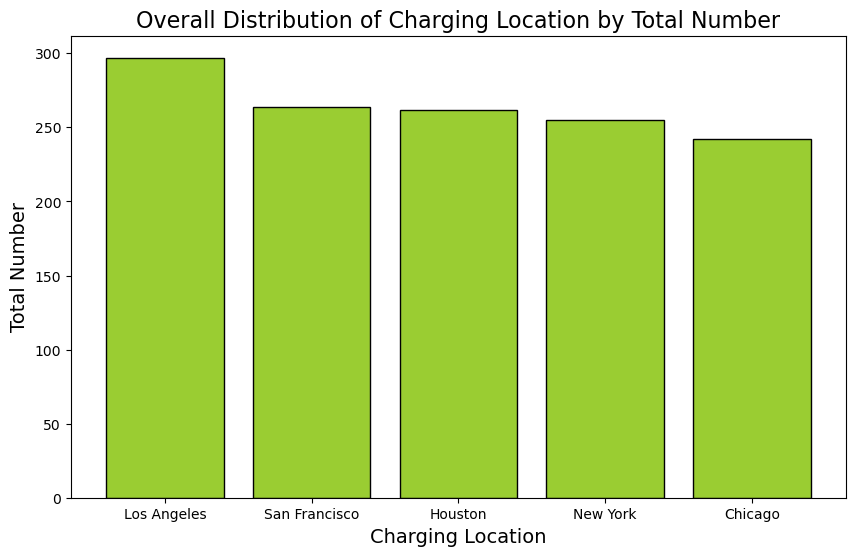

In [41]:
plt.figure(figsize=(10,6))
plt.bar(charge_loc_counts.index, charge_loc_counts.values, color='yellowgreen', edgecolor='black')

plt.xticks(charge_loc_counts.index, charge_loc_counts.index, rotation=0)

plt.xlabel("Charging Location", fontsize=14)
plt.ylabel("Total Number", fontsize=14)
plt.title("Overall Distribution of Charging Location by Total Number", fontsize=16)

plt.show()

In [43]:
df['Time of Day'].value_counts()

Time of Day
Evening      362
Morning      336
Night        312
Afternoon    310
Name: count, dtype: int64

In [45]:
evening_counts = df[df['Time of Day']=='Evening']['Time of Day'].value_counts()
evening_counts

Time of Day
Evening    362
Name: count, dtype: int64

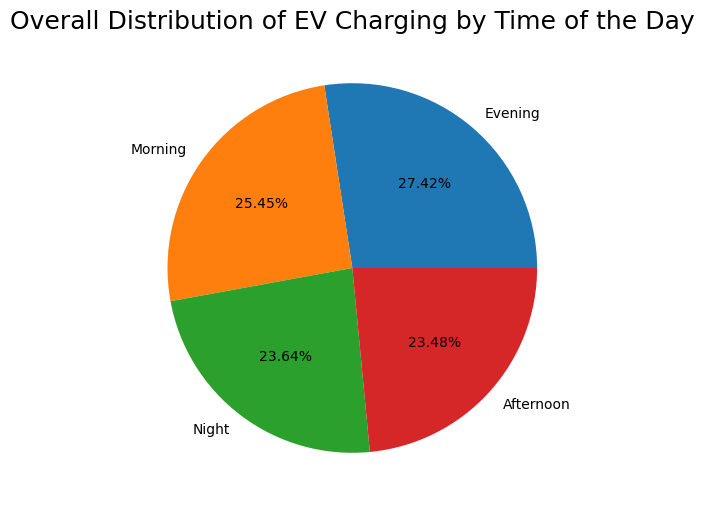

In [47]:
evening_counts = df[df['Time of Day']=='Evening']['Time of Day'].value_counts().values[0]
morning_counts = df[df['Time of Day']=='Morning']['Time of Day'].value_counts().values[0]
night_counts = df[df['Time of Day']=='Night']['Time of Day'].value_counts().values[0]
afternoon_counts = df[df['Time of Day']=='Afternoon']['Time of Day'].value_counts().values[0]

index_values = [evening_counts, morning_counts, night_counts, afternoon_counts]
index_labels=['Evening', 'Morning', 'Night', 'Afternoon']

plt.figure(figsize=(10,6))
plt.pie(index_values, labels =index_labels, autopct='%2.2f%%')
plt.title('Overall Distribution of EV Charging by Time of the Day', fontsize=18)

plt.show()

In [49]:
day_of_the_week_counts = df['Day of Week'].value_counts()
day_of_the_week_counts

Day of Week
Saturday     205
Tuesday      200
Wednesday    197
Sunday       191
Friday       188
Monday       185
Thursday     154
Name: count, dtype: int64

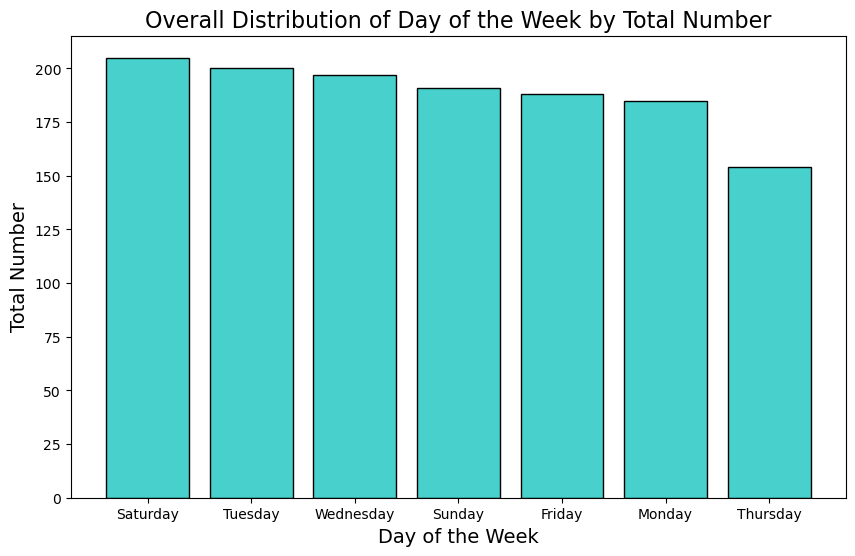

In [51]:
plt.figure(figsize=(10,6))
plt.bar(day_of_the_week_counts.index, day_of_the_week_counts.values, color='mediumturquoise', edgecolor='black')

plt.xticks(day_of_the_week_counts.index, day_of_the_week_counts.index, rotation=0)

plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Total Number", fontsize=14)
plt.title("Overall Distribution of Day of the Week by Total Number", fontsize=16)

plt.show()

In [53]:
charger_type_counts = df['Charger Type'].value_counts()
charger_type_counts

Charger Type
Level 1            459
Level 2            431
DC Fast Charger    430
Name: count, dtype: int64

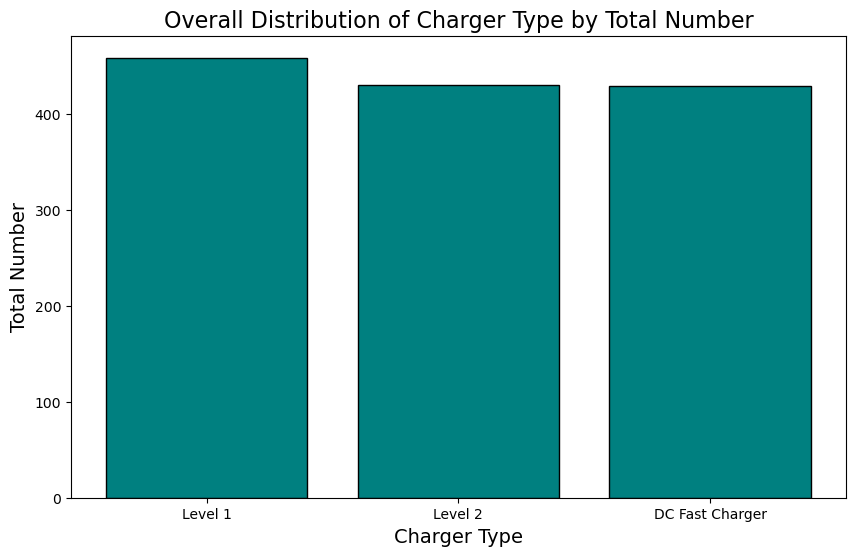

In [55]:
plt.figure(figsize=(10,6))
plt.bar(charger_type_counts.index, charger_type_counts.values, color='teal', edgecolor='black')

plt.xticks(charger_type_counts.index, charger_type_counts.index, rotation=0)

plt.xlabel("Charger Type", fontsize=14)
plt.ylabel("Total Number", fontsize=14)
plt.title("Overall Distribution of Charger Type by Total Number", fontsize=16)

plt.show()

In [57]:
user_type_counts = df['User Type'].value_counts()
user_type_counts

User Type
Commuter                  476
Long-Distance Traveler    437
Casual Driver             407
Name: count, dtype: int64

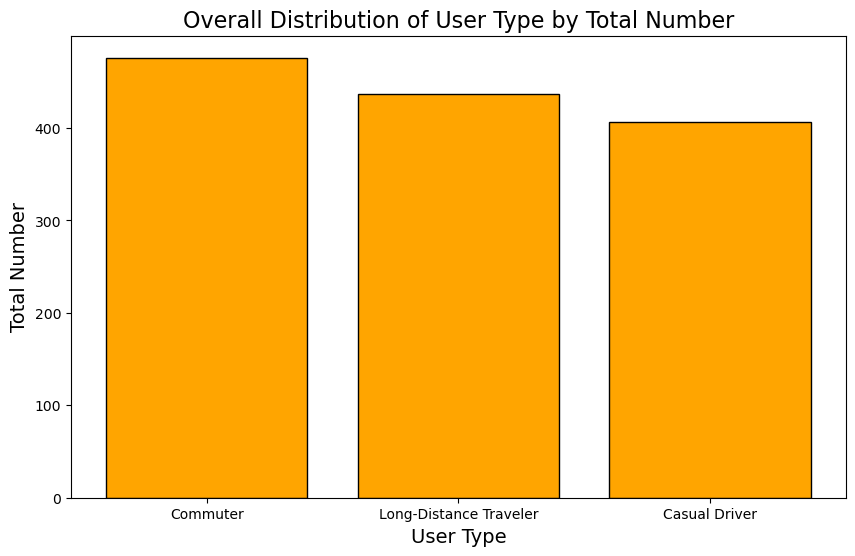

In [59]:
plt.figure(figsize=(10,6))
plt.bar(user_type_counts.index, user_type_counts.values, color='orange', edgecolor='black')

plt.xticks(user_type_counts.index, user_type_counts.index, rotation=0)

plt.xlabel("User Type", fontsize=14)
plt.ylabel("Total Number", fontsize=14)
plt.title("Overall Distribution of User Type by Total Number", fontsize=16)

plt.show()

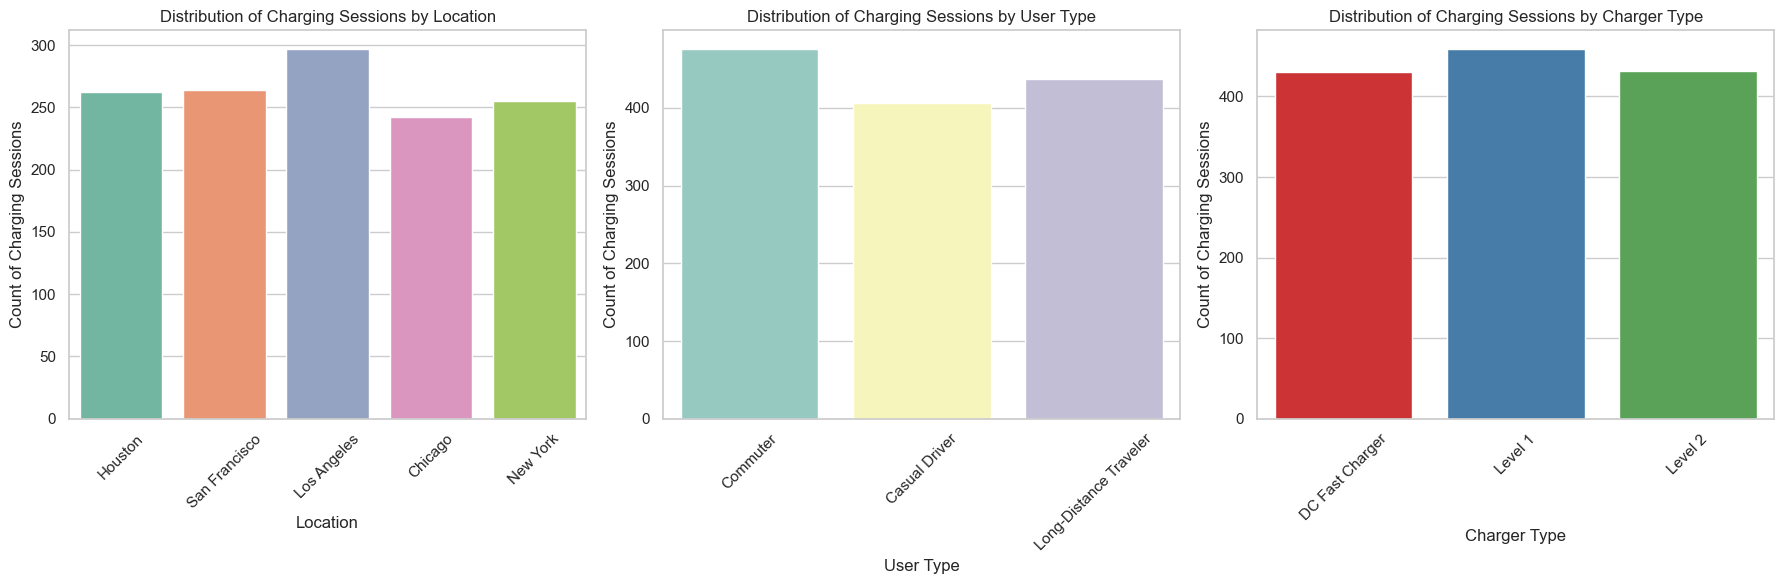

In [61]:
# Distribution of Charging Sessions
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(ax=axes[0], data=df, x='Charging Station Location', palette='Set2')
axes[0].set_title('Distribution of Charging Sessions by Location')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Count of Charging Sessions')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[1], data=df, x='User Type', palette='Set3')
axes[1].set_title('Distribution of Charging Sessions by User Type')
axes[1].set_xlabel('User Type')
axes[1].set_ylabel('Count of Charging Sessions')
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[2], data=df, x='Charger Type', palette='Set1')
axes[2].set_title('Distribution of Charging Sessions by Charger Type')
axes[2].set_xlabel('Charger Type')
axes[2].set_ylabel('Count of Charging Sessions')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

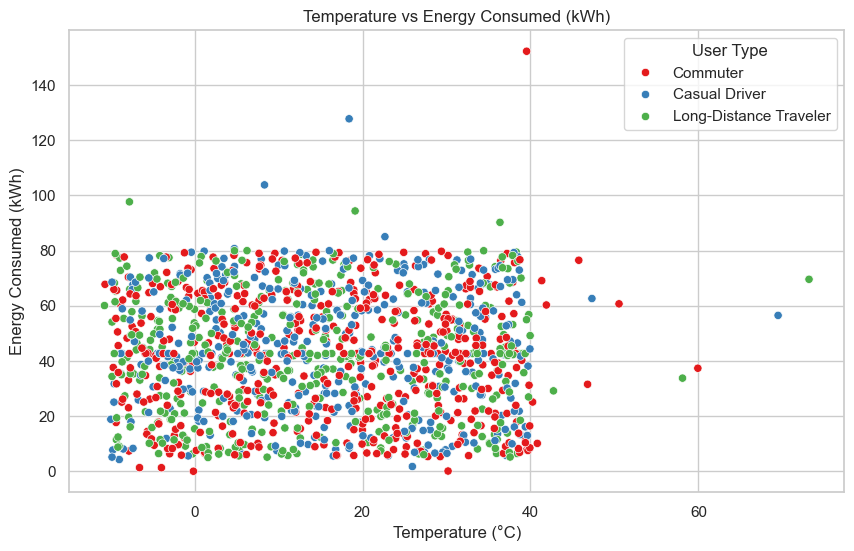

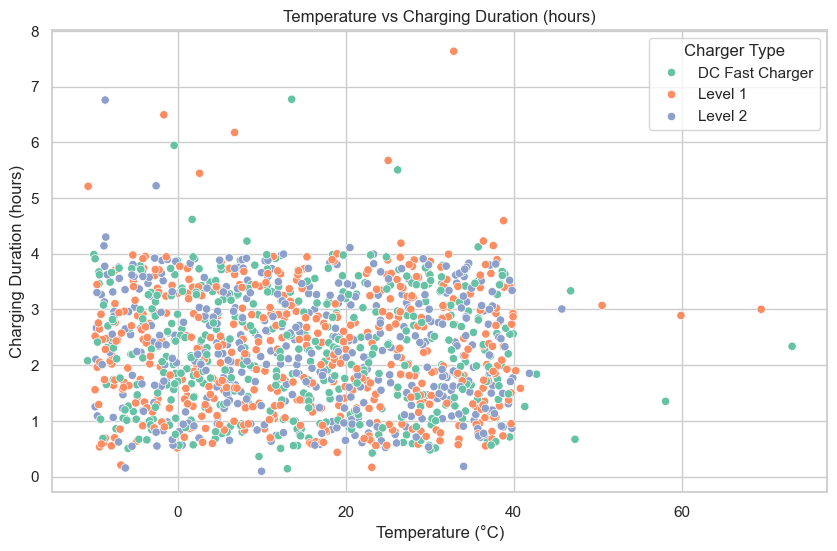

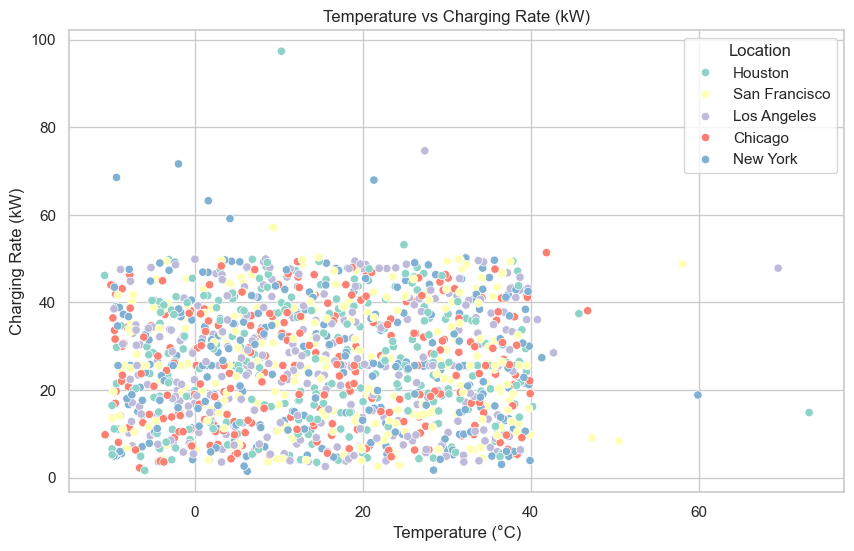

In [63]:
# Influence of Temperature on Charging
import numpy as np

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature (°C)', y='Energy Consumed (kWh)', hue='User Type', palette='Set1')
plt.title('Temperature vs Energy Consumed (kWh)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumed (kWh)')
plt.legend(title='User Type', loc='upper right')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature (°C)', y='Charging Duration (hours)', hue='Charger Type', palette='Set2')
plt.title('Temperature vs Charging Duration (hours)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Charging Duration (hours)')
plt.legend(title='Charger Type', loc='upper right')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature (°C)', y='Charging Rate (kW)', hue='Charging Station Location', palette='Set3')
plt.title('Temperature vs Charging Rate (kW)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Charging Rate (kW)')
plt.legend(title='Location', loc='upper right')
plt.show()

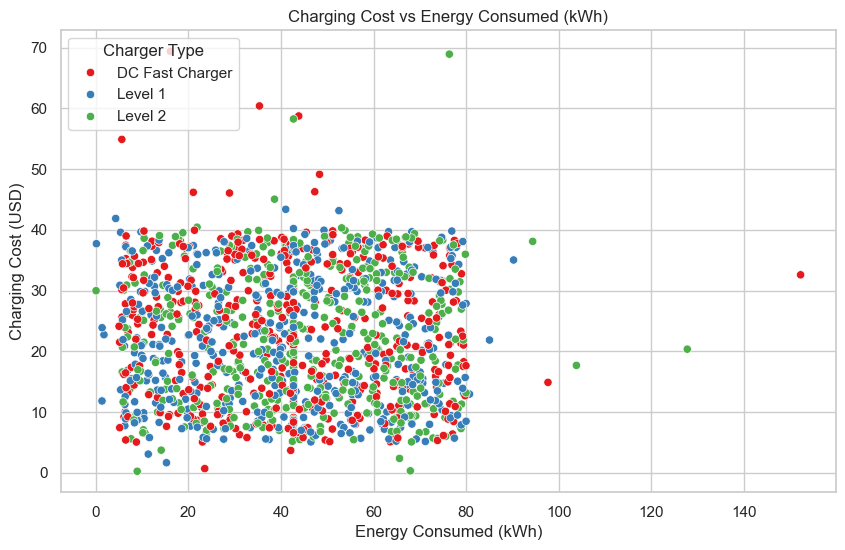

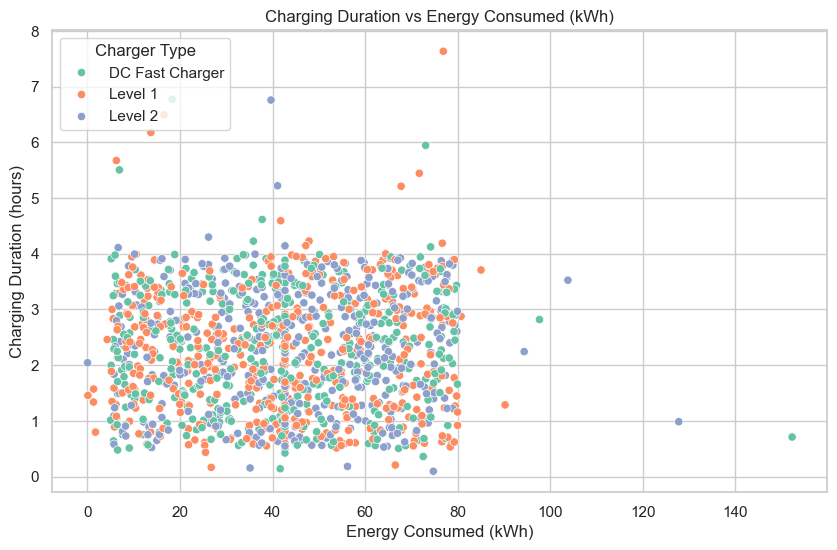

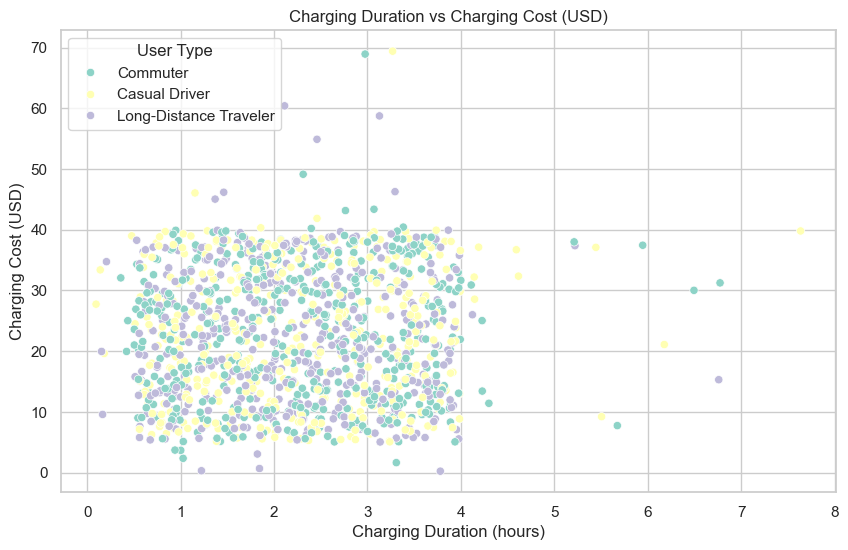

In [65]:
# Relationships Between Charging Cost, Energy Consumed and Charging Duration
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Energy Consumed (kWh)', y='Charging Cost (USD)', hue='Charger Type', palette='Set1')
plt.title('Charging Cost vs Energy Consumed (kWh)')
plt.xlabel('Energy Consumed (kWh)')
plt.ylabel('Charging Cost (USD)')
plt.legend(title='Charger Type', loc='upper left')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Energy Consumed (kWh)', y='Charging Duration (hours)', hue='Charger Type', palette='Set2')
plt.title('Charging Duration vs Energy Consumed (kWh)')
plt.xlabel('Energy Consumed (kWh)')
plt.ylabel('Charging Duration (hours)')
plt.legend(title='Charger Type', loc='upper left')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Charging Duration (hours)', y='Charging Cost (USD)', hue='User Type', palette='Set3')
plt.title('Charging Duration vs Charging Cost (USD)')
plt.xlabel('Charging Duration (hours)')
plt.ylabel('Charging Cost (USD)')
plt.legend(title='User Type', loc='upper left')
plt.show()

In [67]:
# Effect of Energy Consumed and Charging Duration on Charging Cost
from sklearn.linear_model import LinearRegression

X = df[['Energy Consumed (kWh)', 'Charging Duration (hours)']].dropna()
y = df['Charging Cost (USD)']

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

print("Effect of Energy Consumed on Charging Cost:", model.coef_[0])
print("Effect of Charging Duration on Charging Cost:", model.coef_[1])

Intercept: 22.34952827609589
Coefficients: [-0.00396263  0.16339768]
Effect of Energy Consumed on Charging Cost: -0.003962627625894777
Effect of Charging Duration on Charging Cost: 0.1633976772261457


In [69]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
# Feature Engineering
# Let's do a little feature engineering, Let's define Charging Efficiency = (Energy Consumed) / (Charging Duration) Units of Charging Efficiency will be in kWh per hour, since units of Energy Consumed is kWh and that of Charging Duration is hours.

df['Charging Efficiency (kWh per hour)'] = df['Energy Consumed (kWh)'] / df['Charging Duration (hours)']

df['Charging Efficiency (kWh per hour)'].replace([np.inf, -np.inf], np.nan, inplace=True)

df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'], errors='coerce')

df['Hour'] = df['Charging Start Time'].dt.hour
df['Day'] = df['Charging Start Time'].dt.day
df['Day of Week'] = df['Charging Start Time'].dt.dayofweek  # 0=Monday, 6=Sunday
df['Month'] = df['Charging Start Time'].dt.month

df[['Charging Efficiency (kWh per hour)', 'Hour', 'Day', 'Day of Week', 'Month']].head()

,Charging Efficiency (kWh per hour),Hour,Day,Day of Week,Month
0,102.665033,0,1,0,1
1,3.937666,1,1,0,1
2,7.799260,2,1,0,1
3,62.741544,3,1,0,1
4,9.718509,4,1,0,1


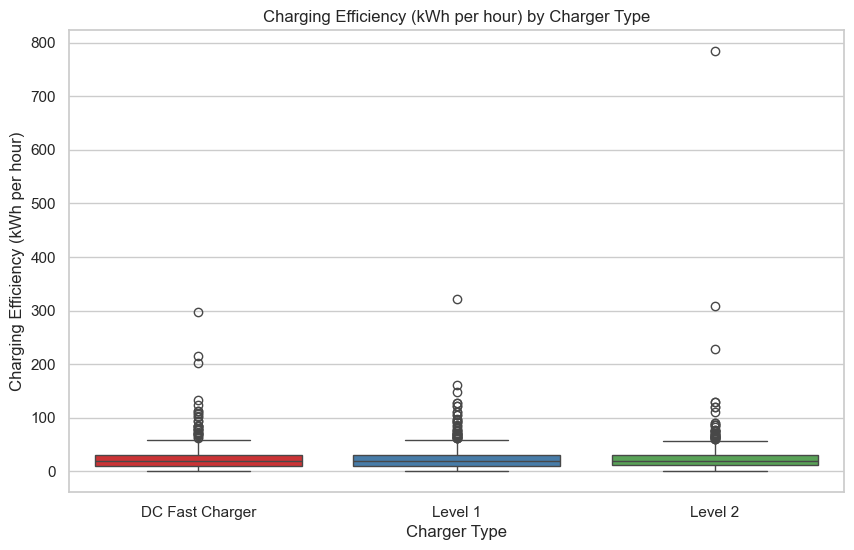

In [73]:
# Charging Efficiency vs. Charger Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Charger Type', y='Charging Efficiency (kWh per hour)', palette='Set1')
plt.title('Charging Efficiency (kWh per hour) by Charger Type')
plt.xlabel('Charger Type')
plt.ylabel('Charging Efficiency (kWh per hour)')
plt.xticks(rotation=0)
plt.show()

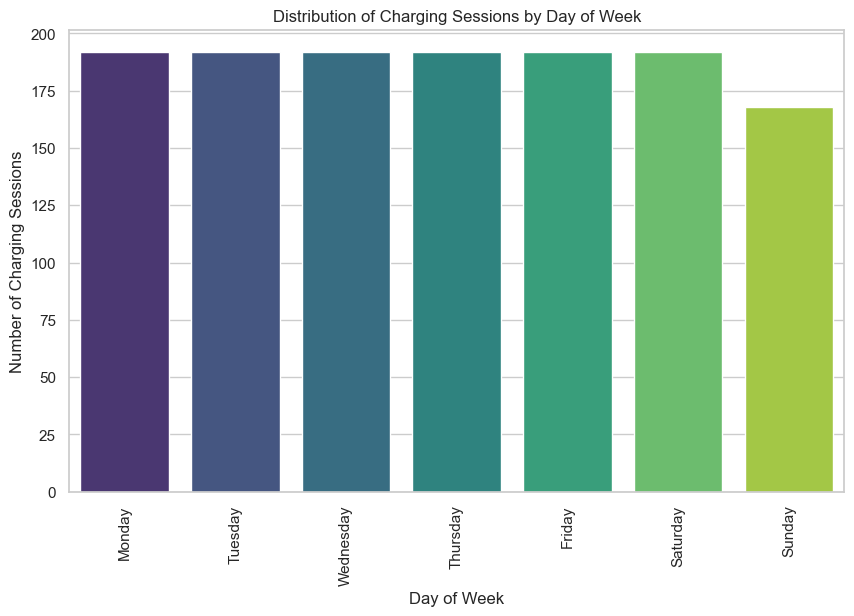

In [75]:
# Distribution of Charging Sessions by Time
plt.figure(figsize=(10, 6))

index_labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(data=df, x='Day of Week', palette='viridis')
plt.title('Distribution of Charging Sessions by Day of Week')

plt.xticks(ticks=range(len(index_labels)), labels=index_labels, rotation=90)

plt.xlabel('Day of Week')
plt.ylabel('Number of Charging Sessions')
plt.show()

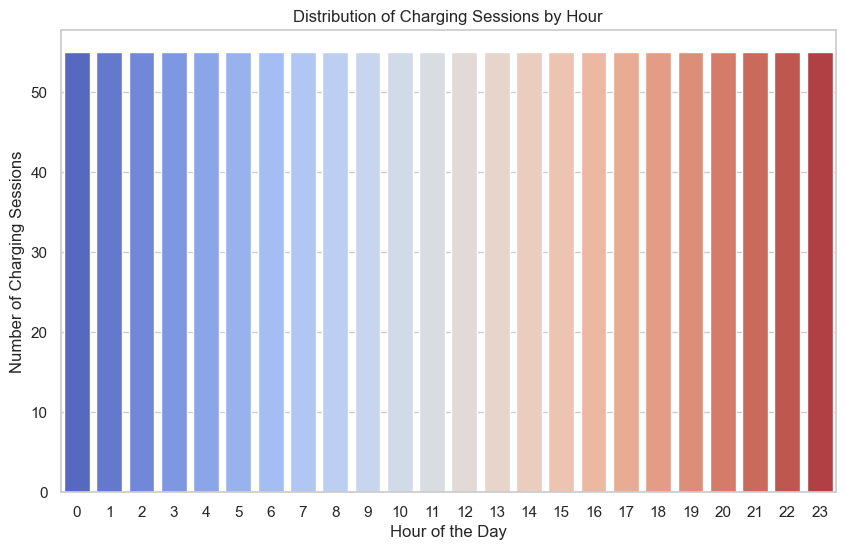

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Hour', palette='coolwarm')
plt.title('Distribution of Charging Sessions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Charging Sessions')
plt.show()

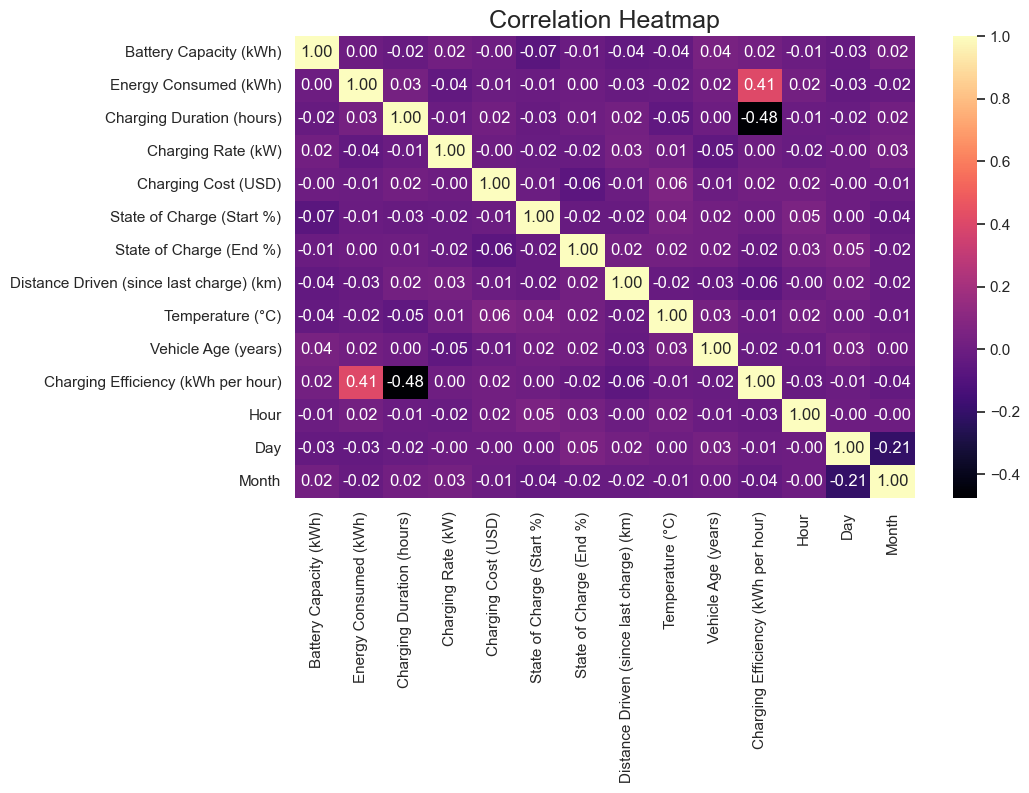

In [79]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
corr_matrix = df.drop(columns=['User ID', 'Vehicle Model', 'Charging Station ID', 'Charging Station Location', 'Charging Start Time', 'Charging End Time', 'Time of Day', 'Day of Week', 'Charger Type', 'User Type']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=18)
plt.show()

SyntaxError: invalid syntax (139566234.py, line 1)